# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv('House_Sales.csv')

In [3]:
house

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,old
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,6
21609,21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1
21610,21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,6
21611,21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11


In [4]:
house.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'old'],
      dtype='object')

In [6]:
house = house.drop(['Unnamed: 0'], axis=1)

In [7]:
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,6
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11


## 1. Correlation

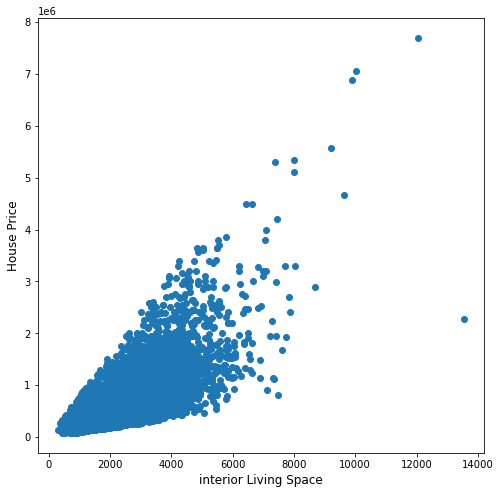

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(house['sqft_living'], house["price"])
plt.xlabel('interior Living Space', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.show()

In [10]:
import seaborn as sns

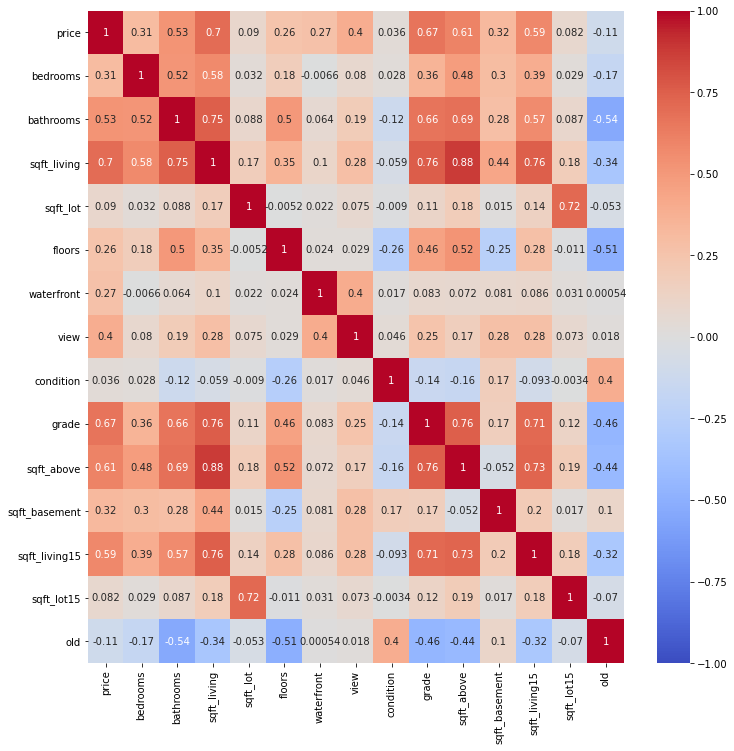

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(house.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm', annot=True)
plt.show()

## 2. Simple Linear Regression

In [12]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28


In [14]:
y = house.iloc[:,0]
x = house.iloc[:,3]

In [15]:
import statsmodels.api as sm

In [17]:
reg = sm.OLS(y,x).fit()

In [18]:
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.126e+05
Date:                Fri, 07 May 2021   Prob (F-statistic):                        0.00
Time:                        11:23:44   Log-Likelihood:                     -3.0032e+05
No. Observations:               21613   AIC:                                  6.006e+05
Df Residuals:                   21612   BIC:                                  6.006e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### Adding Constant

In [19]:
x_c = sm.add_constant(x)

In [20]:
reg = sm.OLS(y,x_c).fit()

In [21]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        11:26:55   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

## 3. Multiple Linear Regression

In [22]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28


In [23]:
x2 = house.iloc[:, 1:]

In [24]:
x2_c = sm.add_constant(x2)

In [27]:
reg = sm.OLS(y, x2_c).fit()

In [28]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2939.
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        11:30:52   Log-Likelihood:            -2.9660e+05
No. Observations:               21613   AIC:                         5.932e+05
Df Residuals:                   21599   BIC:                         5.933e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.255e+05   1.75e+04    -52.815